In [1]:
"""
    Author : Teaching Assistants of LELEC210X - UCLouvain
    Date : 21/11/2023

    Code description :
    __________________
    Automatically write a Hamming window as float array in c file.

"""
import numpy as np
import matplotlib.pyplot as plt
import os
from shutil import copyfile

def updir(path, n):
    for _ in range(n):
        path = os.path.dirname(path)
    return path

from classification.utils.utils import float2fixed

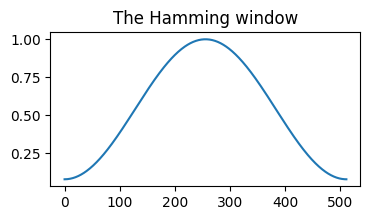

In [2]:
Nft = 512
window = np.hamming(Nft)

"Plot"
plt.figure(figsize=(4,2))
plt.plot(window)
plt.title('The Hamming window')
plt.show()

## Choose format for the window to be hardcoded

In [3]:
"Option"
hardcoded_format = 'q15' #'q15'#'q31' #'float32'

window_q15 = float2fixed(window, maxval=1)
window_q31 = float2fixed(window, maxval=1, q=31)

if (hardcoded_format == 'q15'):
    win = window_q15
elif (hardcoded_format == 'q31'):
    win = window_q31
else :
    win = window

In [9]:
mcu_project_name = 'hands_on_feature_vectors'

filename = os.path.join(updir(os.getcwd(),2),'mcu\{}\Core\Inc\spectrogram_tables.h'.format(mcu_project_name))
temp = os.path.join(updir(os.getcwd(),2),'mcu\{}\Core\Inc\\temp.h'.format(mcu_project_name))

f = open(filename, "r")
f2 = open(temp, "w")

#Copy and paste what is before the window
bool_write = 1
for _, line in enumerate(f):
    print(line)
    if 'hamming_window' in line:
        bool_write = 0
        break

    f2.write(line)

# Write the window
f2.write(hardcoded_format+"_t hamming_window["+ str(Nft) +"] = {")

for elem in win[:-1]:
    f2.write(str(elem) + ", \n")
f2.write(str(win[-1]) + " \n")
f2.write("};")

# make space
f2.write("\n")

# Copy and paste what is after the window
for _, line in enumerate(f):
    print(line)

    if bool_write:
        f2.write(line)

    if '};' in line:
            bool_write = 1

f.close()
f2.close()
copyfile(temp, filename)
os.remove(temp)

/*

 * spectrogram_tables.h

 *

 *  Created on: Nov 21, 2023

 *      Author: Teaching Assistants of LELEC210x

 *      This content is generated from python scripts

 */



#ifndef INC_SPECTROGRAM_TABLES_H_

#define INC_SPECTROGRAM_TABLES_H_



#include "arm_math.h"



q15_t hz2mel_mat[20*256] = {

 0,5689,11379,17069,22759,28448,32680,26991,21301,15611,9921,4231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

 0,0,0,0,0,0,728,6418,12108,17798,23488,29177,31951,26262,20572,14882,9192,3502,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,